In [ ]:
import pandas as pd
import torch
import numpy as np

In [ ]:
datapath = 'extra.csv'
df = pd.read_csv(datapath)
df.head()

,intent_id,intent
0,8,pie chart of ornkvapan column of mydf grouped ...
1,15,show a heatmap with egooxbsihbeahmqq on x axis...
2,0,import pandas
3,10,list all columns of tempdf
4,4,get histogram of fur_m in tempdf


In [ ]:
df=df[~df['intent_id'].isin([0,1,2])]
df['intent_id']=df['intent_id']-3

In [ ]:
df.shape

(5000, 2)

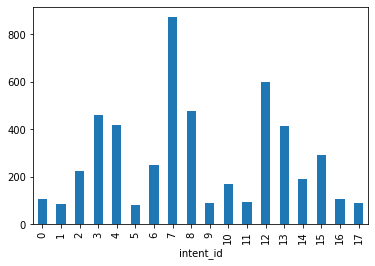

In [ ]:
df.groupby(['intent_id']).size().plot.bar()

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 62.3 MB/s 
     |████████████████████████████████| 67 kB 7.4 MB/s 
     |████████████████████████████████| 895 kB 70.5 MB/s 
     |████████████████████████████████| 596 kB 77.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
example_text = 'show me top 50 records'
bert_input = tokenizer(example_text,padding='max_length', max_length = 10, 
                       truncation=True, return_tensors="pt")

bert_input

{'input_ids': tensor([[ 101, 2265, 2033, 2327, 2753, 2636,  102,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]])}

In [ ]:
from torch import nn
_bert= DistilBertModel.from_pretrained("distilbert-base-uncased")
pooled_output = _bert(input_ids= bert_input['input_ids'], attention_mask=bert_input['attention_mask'],return_dict=False)
# linear=nn.Linear(768, 768)
# linear(pooled_output)
# # example_text
hidden_state = pooled_output[0]                    
hidden_state[:, 0].shape

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([1, 768])

In [ ]:
_bert= DistilBertModel.from_pretrained("distilbert-base-uncased")
pooled_output = _bert(input_ids= bert_input['input_ids'], attention_mask=bert_input['attention_mask'],return_dict=False)
pooled_output[0].detach().numpy().shape

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(1, 10, 768)

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', problem_type="multi_label_classification")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
labels = torch.tensor([[1, 1]], dtype=torch.float) # need dtype=float for BCEWithLogitsLoss
outputs = model(**inputs, labels=labels)
outputs

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

SequenceClassifierOutput([('loss',
                           tensor(0.6515, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)),
                          ('logits',
                           tensor([[0.0922, 0.0780]], grad_fn=<AddmmBackward0>))])

In [ ]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [label for label in df['intent_id']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['intent']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

3670 459 459


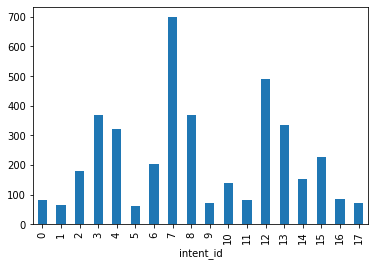

In [ ]:
df_train.groupby(['intent_id']).size().plot.bar()

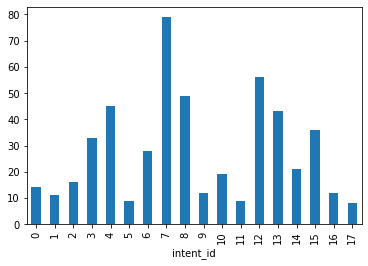

In [ ]:
df_val.groupby(['intent_id']).size().plot.bar()

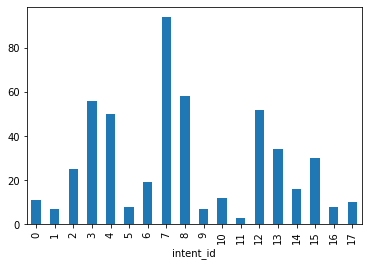

In [ ]:
df_test.groupby(['intent_id']).size().plot.bar()

In [ ]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert =  DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 18)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        hidden_state = pooled_output[0]                    
        output=hidden_state[:, 0]
        dropout_output = self.dropout(output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [ ]:
torch.save(model.state_dict(), 'checkpoint.pth')
state_dict = torch.load('checkpoint.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label)
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label)
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  
EPOCHS = 3
model = BertClassifier()
LR = 1e-6
              
train(model, df, df_val, LR, EPOCHS)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 2294/2294 [04:21<00:00,  8.78it/s]


Epochs: 1 | Train Loss:  0.669                 | Train Accuracy:  0.694                 | Val Loss:  0.179                 | Val Accuracy:  0.965


100%|██████████| 2294/2294 [04:24<00:00,  8.67it/s]


Epochs: 2 | Train Loss:  0.071                 | Train Accuracy:  0.992                 | Val Loss:  0.026                 | Val Accuracy:  1.000


100%|██████████| 2294/2294 [04:24<00:00,  8.67it/s]


Epochs: 3 | Train Loss:  0.015                 | Train Accuracy:  1.000                 | Val Loss:  0.009                 | Val Accuracy:  1.000


In [ ]:
torch.save(model.state_dict(), 'distil_bert_intent.pth')

In [ ]:
input=["show me dataset"]

output=tokenizer(input, padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt")

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

if use_cuda:
  model = model.cuda()

with torch.no_grad():
  result=model(output['input_ids'].to(device),output['attention_mask'].to(device))
  print(np.argmax(result.cpu().numpy()))

12


In [ ]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [ ]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 11.1 ms, sys: 971 µs, total: 12 ms
Wall time: 3 s


In [ ]:
from dask import delayed


In [ ]:
%%time

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 301 µs, sys: 40 µs, total: 341 µs
Wall time: 349 µs


In [ ]:
z

Delayed('add-057fd982-5f47-43dd-9ce0-d74b53de49de')

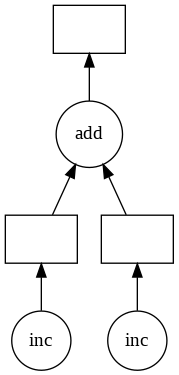

In [ ]:
z.visualize()

In [ ]:
%%time

z.compute()

CPU times: user 10.5 ms, sys: 332 µs, total: 10.9 ms
Wall time: 2 s


5

In [ ]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
%%time

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 29.3 ms, sys: 6.11 ms, total: 35.4 ms
Wall time: 8.01 s


In [ ]:
%%time
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)

total.compute()

CPU times: user 21.6 ms, sys: 2.49 ms, total: 24.1 ms
Wall time: 4.01 s


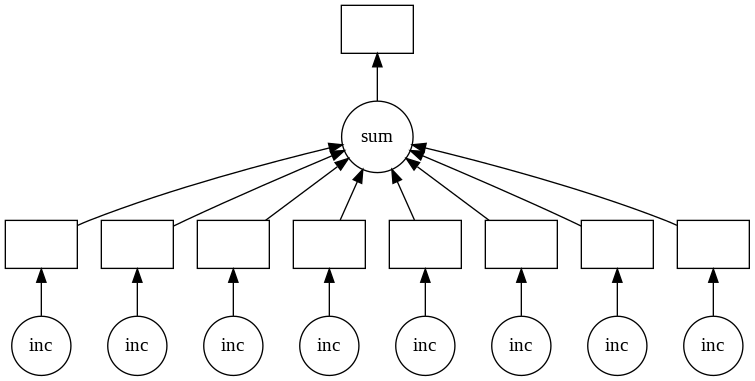

In [ ]:
total.visualize()

In [ ]:
import urllib

print("- Downloading NYC Flights dataset... ", end='', flush=True)
url = "https://storage.googleapis.com/dask-tutorial-data/nycflights.tar.gz"
filename, headers = urllib.request.urlretrieve(url, 'nycflights.tar.gz')
print("Done!", flush=True)

- Downloading NYC Flights dataset... Done!


In [ ]:
import tarfile

# extract the .csv files from the tar file
with tarfile.open(filename, mode='r:gz') as flights:
            flights.extractall('data/')

In [ ]:
import os
import dask.dataframe as dd

df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
                 parse_dates={'Date': [0, 1, 2]})

df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
# for coloumns with mixed dtypes we have to infer the correct type
df = dd.read_csv(os.path.join('data', 'nycflights', '*.csv'),
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

In [ ]:
len(df.columns)

21

In [ ]:
%time df.DepDelay.max().compute()

CPU times: user 6.17 s, sys: 325 ms, total: 6.49 s
Wall time: 4.12 s


1435.0

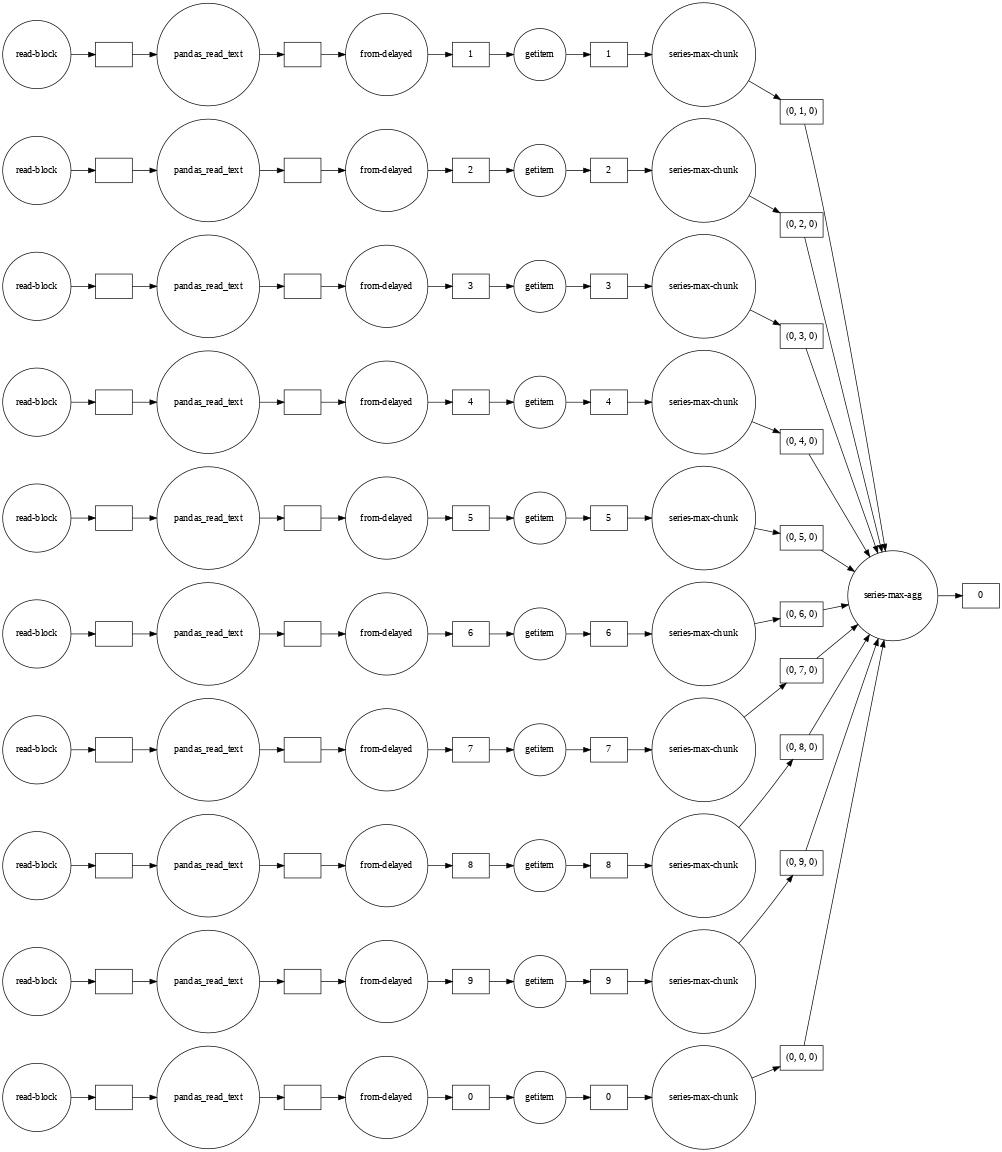

In [ ]:
df.DepDelay.max().visualize(rankdir="LR", size="12, 12!")

In [ ]:
# You can grab columns from the Dask DataFrame just as you would with Pandas
df_train = df[['CRSDepTime',  'CRSArrTime', 'Cancelled']]

In [ ]:
df_train.isnull().sum().compute()

Date                       0
DayOfWeek                  0
DepTime                70931
CRSDepTime                 0
ArrTime                78210
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum              1313006
ActualElapsedTime      78210
CRSElapsedTime          1965
AirTime              1356823
ArrDelay               78210
DepDelay               70931
Origin                     0
Dest                       0
Distance                1495
TaxiIn               1313006
TaxiOut              1313006
Cancelled                  0
Diverted                   0
dtype: int64

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Build a simple Keras Model
model = Sequential()
model.add(Dense(20, input_dim=df.shape[1], activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd',)

In [ ]:
# generate batches of data from our dask dataframe
def dask_data_generator(df, fraction=0.01):
  while True:
    batch = df.sample(frac=fraction)
    X = batch.iloc[:, :-1]
    y = batch.iloc[:, -1]
    yield (X.compute(), y.compute())

In [ ]:
# never run out-of-memory while training
model.fit_generator(generator=dask_data_generator(df_train),
                    steps_per_epoch=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: ignored